In [28]:
using CSV
using DataFrames
using Dates
using Plots

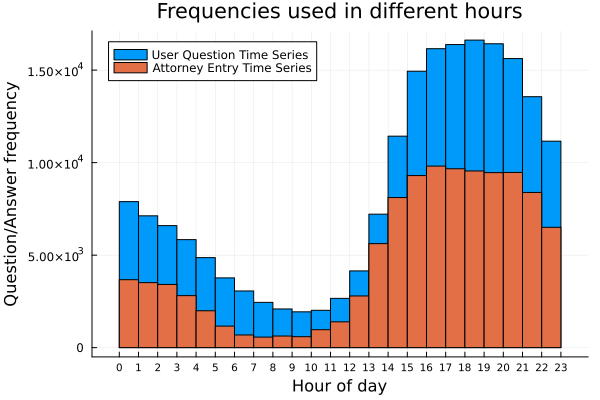

In [64]:
questionsData = CSV.File("questions.csv")
df = DataFrame(questionsData)
# parse into DateTime objects

datetime_vec = map(x -> DateTime(x, "yyyy-mm-dd HH:MM:SS"), df[!, "AskedOnUtc"])

# create a vector of hours from the DateTime objects
hour_vec = hour.(datetime_vec)
histogram(hour_vec, bins=0:23, xticks=0:23, xtickfont=7, label = "User Question Time Series")

answerData = CSV.File("attorneytimeentries.csv")
df1 = DataFrame(answerData)
# parse into DateTime objects

datetime_vec_ans = map(x -> DateTime(x, "yyyy-mm-dd HH:MM:SS"), df1[!, "EnteredOnUtc"])

# create a vector of hours from the DateTime objects
hour_vec_ans = hour.(datetime_vec_ans)
histogram!(hour_vec_ans, bins=0:23, xticks=0:23, xtickfont=7, label="Attorney Entry Time Series")
title!("Frequencies used in different hours")
xlabel!("Hour of day")
ylabel!("Question/Answer frequency")




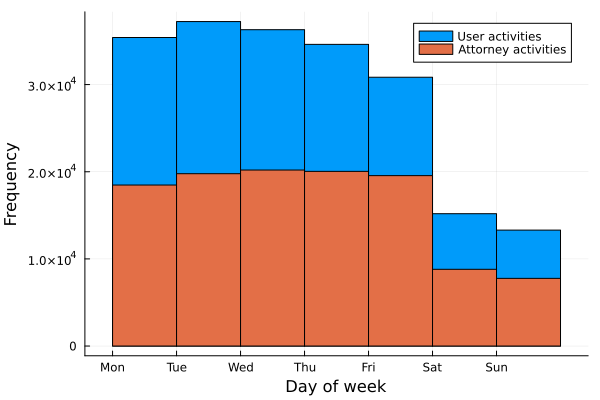

In [63]:
dayofweek_vec = dayofweek.(datetime_vec)
# Convert to vector of integers representing day of the week

# Create histogram
histogram(dayofweek_vec, bins=7, xticks=(1:7, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]), label = "User activities")

dayofweek_vec_ans = dayofweek.(datetime_vec_ans)
# Create histogram
histogram!(dayofweek_vec_ans, bins=7, xticks=(1:7, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]), label = "Attorney activities")
xlabel!("Day of week")
ylabel!("Frequency")